Total possible values in IEEE-754 (32-bit): 4,294,967,296

Chunking Strategy:
- 4-bit chunk: 16 possible values
- 6-bit chunk: 64 possible values
- 8-bit chunk: 256 possible values
- 12-bit chunk: 4,096 possible values

Example Weight: 1.75 (Binary: 00111111111000000000000000000000)
Extracted Mantissa: 11000000000000000000000

Mantissa Split into 4-bit Chunks:
Chunk 1: 1100
Chunk 2: 0000
Chunk 3: 0000
Chunk 4: 0000
Chunk 5: 0000
Chunk 6: 000


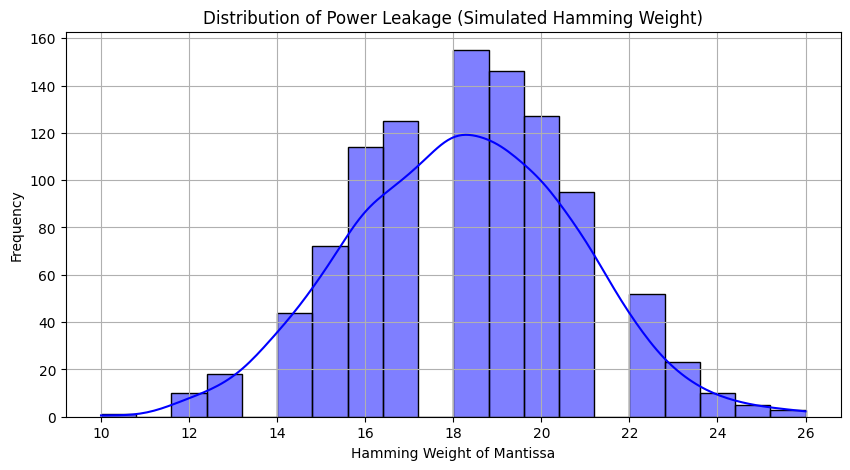

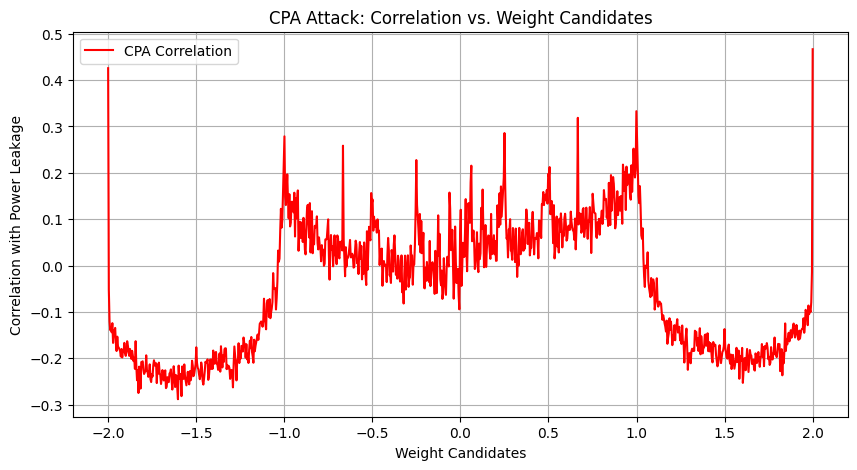


Recovered Weight: 2.000000 (Best correlation found at index 999)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ===============================
# Question 1: Count Possible Values in IEEE-754
# ===============================


sign_bits = 1
exponent_bits = 8
mantissa_bits = 23

total_bits = sign_bits + exponent_bits + mantissa_bits
total_possible_values = 2 ** total_bits

print(f"Total possible values in IEEE-754 (32-bit): {total_possible_values:,}")

# ===============================
# Question 2: Creating Smaller Chunks
# ===============================


chunk_sizes = [4, 6, 8, 12]
possible_values_per_chunk = [2 ** size for size in chunk_sizes]

print("\nChunking Strategy:")
for size, values in zip(chunk_sizes, possible_values_per_chunk):
    print(f"- {size}-bit chunk: {values:,} possible values")

# ===============================
# Question 3: Using Chunks in CPA Attack
# ===============================

def float_to_bin(f):
    """Convert IEEE 754 float to 32-bit binary representation."""
    return format(np.frombuffer(np.float32(f).tobytes(), dtype=np.uint32)[0], '032b')

def extract_mantissa(binary_representation):
    """Extract the 23-bit mantissa from a 32-bit IEEE 754 binary string."""
    return binary_representation[9:]


example_weight = 1.75
binary_rep = float_to_bin(example_weight)
mantissa = extract_mantissa(binary_rep)


chunk_size = 4
mantissa_chunks = [mantissa[i:i+chunk_size] for i in range(0, len(mantissa), chunk_size)]

print(f"\nExample Weight: {example_weight} (Binary: {binary_rep})")
print(f"Extracted Mantissa: {mantissa}")

print("\nMantissa Split into 4-bit Chunks:")
for idx, chunk in enumerate(mantissa_chunks):
    print(f"Chunk {idx+1}: {chunk}")



def hamming_weight(n):
    """Compute the Hamming weight (number of 1s in a binary representation)."""
    return bin(n).count("1")


num_samples = 1000
input_values = np.random.uniform(-2, 2, num_samples)


leakage_hw = np.array([hamming_weight(int(float_to_bin(x), 2)) for x in input_values])


plt.figure(figsize=(10, 5))
sns.histplot(leakage_hw, bins=20, kde=True, color='blue')
plt.xlabel("Hamming Weight of Mantissa")
plt.ylabel("Frequency")
plt.title("Distribution of Power Leakage (Simulated Hamming Weight)")
plt.grid()
plt.show()



num_candidates = 1000
weight_candidates = np.linspace(-2, 2, num_candidates)


hypothetical_leakage = np.array([[hamming_weight(int(float_to_bin(w * x), 2)) for w in weight_candidates] for x in input_values])


correlation_matrix = np.array([np.corrcoef(leakage_hw, hypothetical_leakage[:, i])[0, 1] for i in range(num_candidates)])


plt.figure(figsize=(10, 5))
plt.plot(weight_candidates, correlation_matrix, label="CPA Correlation", color='red')
plt.xlabel("Weight Candidates")
plt.ylabel("Correlation with Power Leakage")
plt.title("CPA Attack: Correlation vs. Weight Candidates")
plt.legend()
plt.grid()
plt.show()


best_weight_idx = np.argmax(np.abs(correlation_matrix))
best_weight = weight_candidates[best_weight_idx]

print(f"\nRecovered Weight: {best_weight:.6f} (Best correlation found at index {best_weight_idx})")
